In [1]:
import numpy as np
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

In [2]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 8600 files belonging to 23 classes.


In [3]:
class_name = validation_set.class_names

In [4]:
print(class_name)

['Acne and Rosacea Photos', 'Actinic Keratosis Basal Cell Carcinoma and other Malignant Lesions', 'Atopic Dermatitis Photos', 'Bullous Disease Photos', 'Cellulitis Impetigo and other Bacterial Infections', 'Eczema Photos', 'Exanthems and Drug Eruptions', 'Hair Loss Photos Alopecia and other Hair Diseases', 'Herpes HPV and other STDs Photos', 'Light Diseases and Disorders of Pigmentation', 'Lupus and other Connective Tissue diseases', 'Melanoma Skin Cancer Nevi and Moles', 'Nail Fungus and other Nail Disease', 'Poison Ivy Photos and other Contact Dermatitis', 'Psoriasis pictures Lichen Planus and related diseases', 'Scabies Lyme Disease and other Infestations and Bites', 'Seborrheic Keratoses and other Benign Tumors', 'Systemic Disease', 'Tinea Ringworm Candidiasis and other Fungal Infections', 'Urticaria Hives', 'Vascular Tumors', 'Vasculitis Photos', 'Warts Molluscum and other Viral Infections']


In [11]:
model = tf.keras.models.load_model('trained_model.keras')

In [15]:
pip install opencv-python


   ---------------------------------------- 0.0/38.8 MB ? eta -:--:--
   ---------------------------------------- 0.3/38.8 MB ? eta -:--:--
    --------------------------------------- 0.8/38.8 MB 2.4 MB/s eta 0:00:16
   - -------------------------------------- 1.6/38.8 MB 2.8 MB/s eta 0:00:14
   -- ------------------------------------- 2.4/38.8 MB 3.0 MB/s eta 0:00:13
   -- ------------------------------------- 2.9/38.8 MB 3.2 MB/s eta 0:00:12
   --- ------------------------------------ 3.7/38.8 MB 3.1 MB/s eta 0:00:12
   ---- ----------------------------------- 4.5/38.8 MB 3.2 MB/s eta 0:00:11
   ----- ---------------------------------- 5.2/38.8 MB 3.2 MB/s eta 0:00:11
   ----- ---------------------------------- 5.8/38.8 MB 3.1 MB/s eta 0:00:11
   ------ --------------------------------- 6.3/38.8 MB 3.1 MB/s eta 0:00:11
   ------ --------------------------------- 6.6/38.8 MB 3.0 MB/s eta 0:00:11
   ------- -------------------------------- 7.1/38.8 MB 2.9 MB/s eta 0:00:11
   ------- -

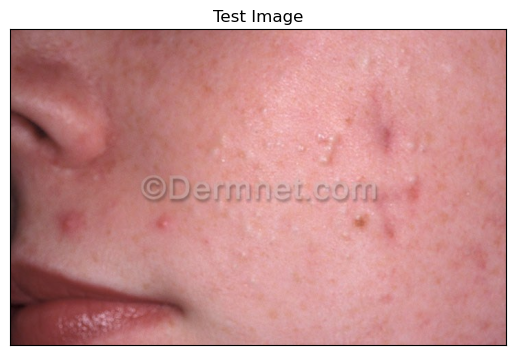

In [139]:
import cv2
image_path = 'test/Acne and Rosacea Photos/acne-closed-comedo-20.jpg'
img = cv2.imread(image_path)
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB) #Converting BGR to RGB
# Displaying the image 
plt.imshow(img)
plt.title('Test Image')
plt.xticks([])
plt.yticks([])
plt.show()

In [141]:
image = tf.keras.preprocessing.image.load_img(image_path,target_size=(128,128))
input_arr = tf.keras.preprocessing.image.img_to_array(image)
input_arr = np.array([input_arr])  # Convert single image to a batch.
predictions = model.predict(input_arr)

1/1 [==============================] - 0s 77ms/step


In [143]:
print(predictions)

[[9.7581452e-01 4.6119837e-11 2.3772715e-02 6.0467048e-10 2.3783891e-06
  5.2033160e-05 2.2063641e-05 6.9393610e-12 5.9435493e-08 4.0121657e-05
  4.1401810e-05 6.6082231e-12 2.3641973e-09 2.6303288e-09 9.4757425e-08
  2.5413301e-06 1.3005000e-11 3.5218561e-06 4.9944134e-08 1.9669009e-04
  2.3908626e-08 8.4464675e-09 5.1786130e-05]]


In [145]:
result_index = np.argmax(predictions) #Return index of max element
print(result_index)

0


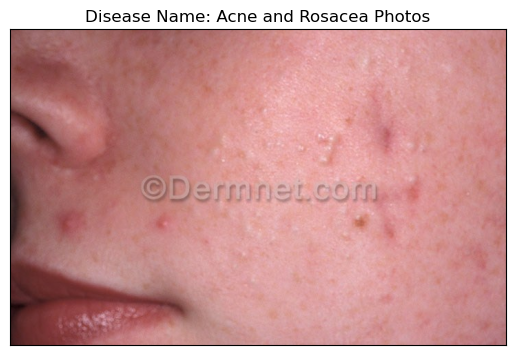

In [147]:
model_prediction = class_name[result_index]
plt.imshow(img)
plt.title(f"Disease Name: {model_prediction}")
plt.xticks([])
plt.yticks([])
plt.show()